       Latitude  Longitude  Average temperature per year  \
count  38472.00   38472.00                      38472.00   
mean      23.74      20.21                         17.72   
std       26.06      61.07                          8.13   
min      -40.90    -106.35                         -2.00   
25%        8.62      -3.44                         11.00   
50%       27.51      21.82                         20.00   
75%       45.94      47.48                         25.00   
max       64.96     179.41                         29.00   

       Hospital beds per 1000 people  Medical doctors per 1000 people  \
count                       38472.00                         38472.00   
mean                            3.17                             2.09   
std                             2.56                             1.52   
min                             0.20                             0.02   
25%                             1.40                             0.82   
50%                  

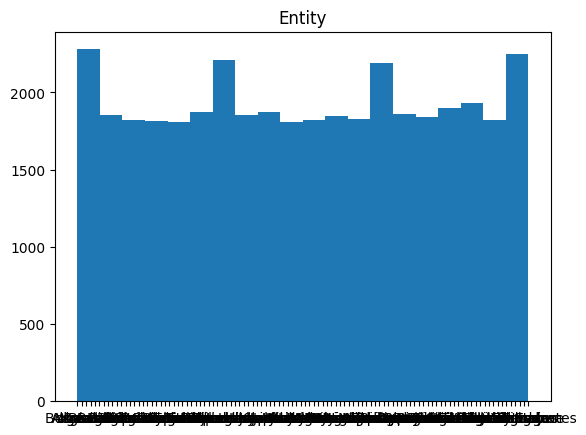

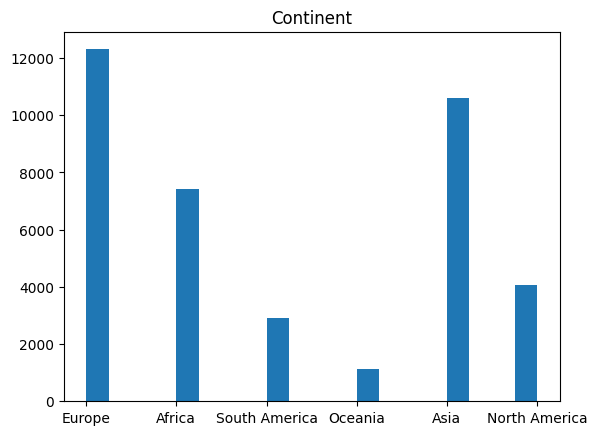

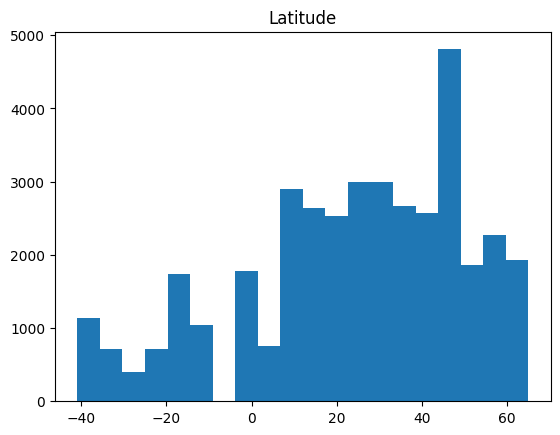

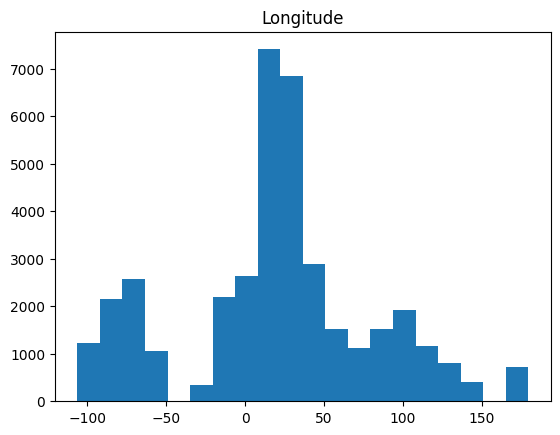

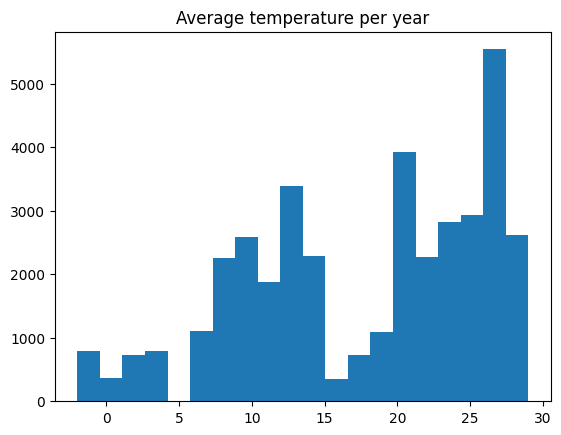

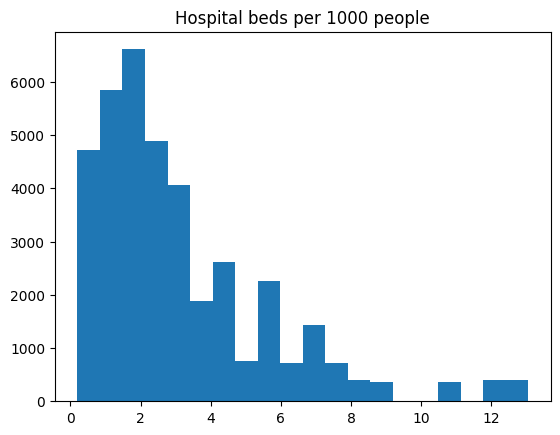

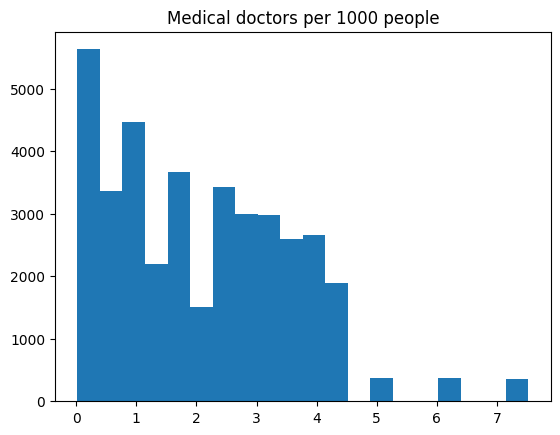

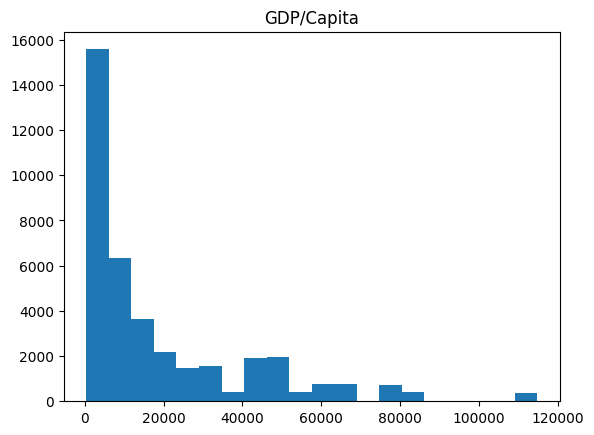

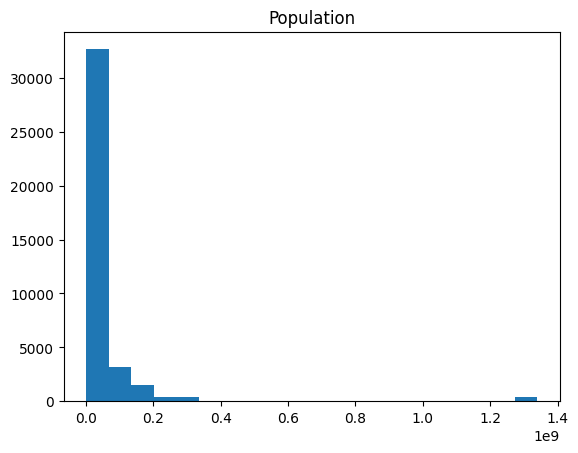

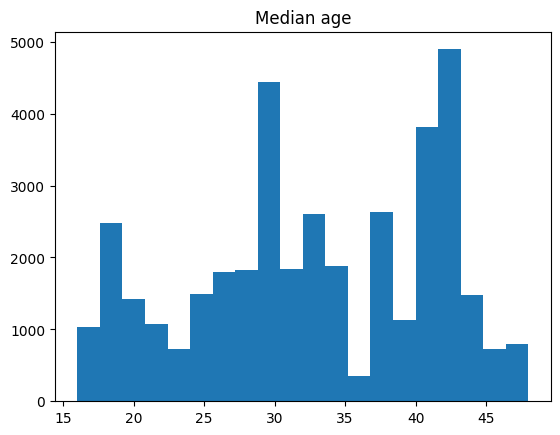

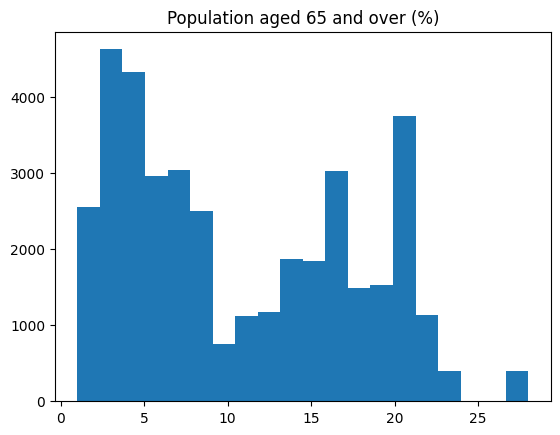

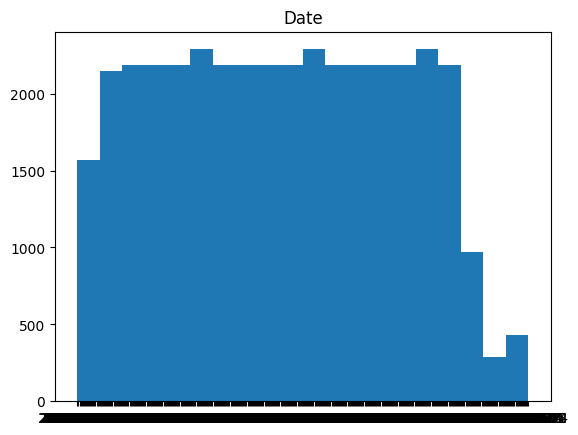

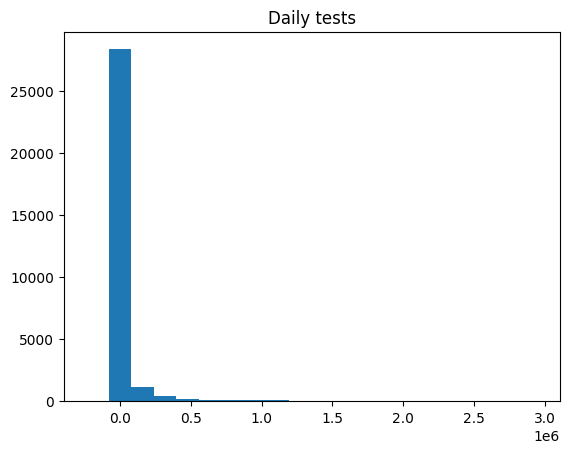

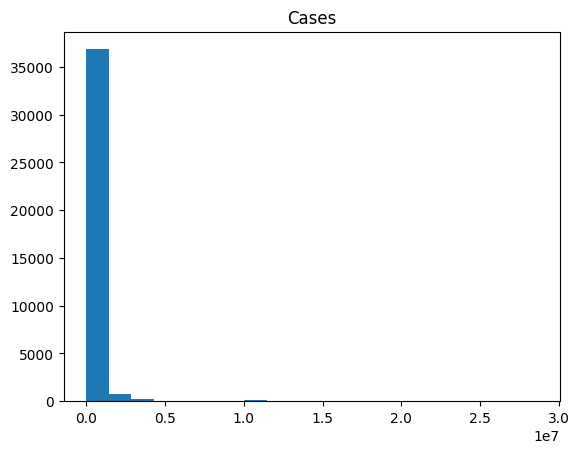

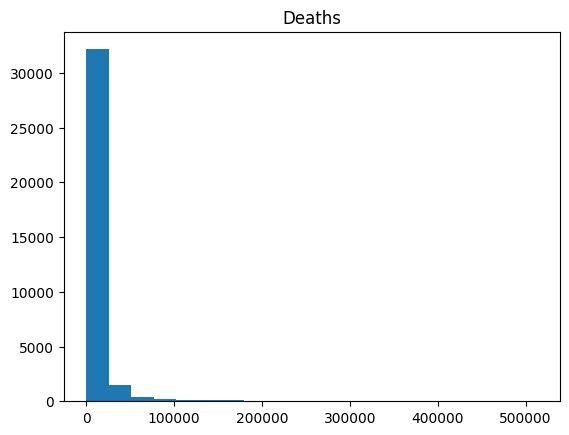

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('data.csv')

print(df.describe().round(2))
for col in df.columns:
    plt.hist(df[col], bins=20)
    plt.title(col)
    plt.show()


                                   Entity  Continent  Latitude  Longitude  \
Entity                           1.000000  -0.268636 -0.059534   0.131542   
Continent                       -0.268636   1.000000 -0.205369  -0.372422   
Latitude                        -0.059534  -0.205369  1.000000   0.024708   
Longitude                        0.131542  -0.372422  0.024708   1.000000   
Average temperature per year     0.067391  -0.137432 -0.565850   0.006162   
Hospital beds per 1000 people   -0.063388   0.152207  0.462516   0.114330   
Medical doctors per 1000 people -0.157657   0.305565  0.546977  -0.090416   
GDP/Capita                      -0.067690   0.281347  0.463543  -0.084268   
Population                       0.197262  -0.090209 -0.154468   0.137849   
Median age                      -0.109075   0.250053  0.602645   0.017314   
Population aged 65 and over (%) -0.126372   0.257427  0.539322  -0.054349   
Daily tests                      0.081944   0.039379  0.248087   0.049536   

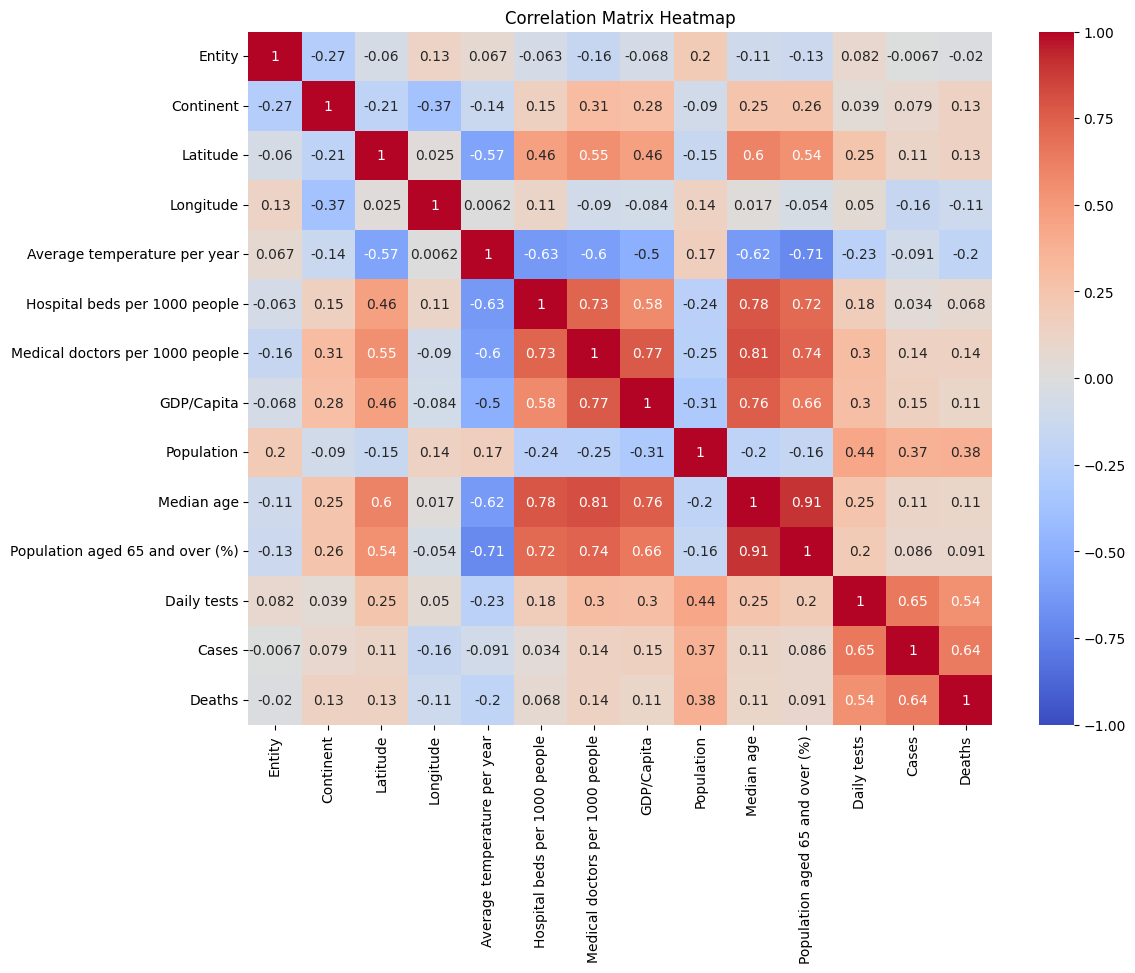

In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [126]:

import numpy as np
from scipy.stats import boxcox, yeojohnson
from sklearn.preprocessing import MinMaxScaler, StandardScaler

for col in df.columns:
    x=df[col].isnull().sum()

    if(x>0):
        print("The number of null in the column",col,"is: ",x)

    

df["Cases"]=df["Cases"].fillna(df["Cases"].median())
df["Date"] = pd.to_datetime(df["Date"])

#df.rename(columns={'Entity': 'New_Entity_Name'}, inplace=True)
df = df.sort_values(by=['Entity', 'Date']).apply(lambda x: x.fillna(method='ffill'))
df = df.sort_values(by=['Entity', 'Date']).apply(lambda x: x.fillna(method='bfill'))
df = df[df["Daily tests"] > 0]
for col in df.columns:
    x=df[col].isnull().sum()

    if(x>0):
        print("The number of null in the column",col,"is: ",x)
        
df.describe()


The number of null in the column Daily tests is:  7895
The number of null in the column Cases is:  254
The number of null in the column Deaths is:  3610


,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Daily tests,Cases,Deaths
count,38344.000000,38344.000000,38344.000000,38344.000000,38344.000000,38344.000000,3.834400e+04,38344.000000,38344.000000,3.834400e+04,3.834400e+04,38344.000000
mean,23.673660,20.245846,17.731718,3.157412,2.083103,18940.479418,4.893520e+07,32.724311,10.635667,3.663637e+04,2.868410e+05,9992.610265
std,26.065418,61.137903,8.142270,2.561441,1.519298,22274.462413,1.429572e+08,8.469707,6.760855,1.389819e+05,1.402990e+06,34284.163002
min,-40.900000,-106.350000,-2.000000,0.200000,0.020000,411.600000,3.412840e+05,16.000000,1.000000,1.000000e+00,1.000000e+00,1.000000
25%,8.620000,-3.440000,11.000000,1.400000,0.820000,3659.000000,4.793900e+06,27.000000,5.000000,1.489000e+03,2.114000e+03,98.000000
50%,27.510000,21.820000,20.000000,2.500000,1.890000,8821.800000,1.148464e+07,32.000000,8.000000,5.259500e+03,2.143100e+04,624.500000
75%,45.940000,47.480000,25.000000,4.490000,3.210000,25946.200000,4.286296e+07,41.000000,16.000000,1.970650e+04,1.360285e+05,4414.250000
max,64.960000,179.410000,29.000000,13.050000,7.520000,114704.600000,1.339180e+09,48.000000,28.000000,2.945871e+06,2.860567e+07,513091.000000


In [127]:
import numpy as np
import pandas as pd
from scipy.stats import boxcox, yeojohnson
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load your dataset
# Replace 'your_data.csv' with your dataset filename
data = df.drop(['Latitude',"Longitude"], axis=1)

#normalize cords
cord = df[['Latitude',"Longitude"]]
scalerMinMax = MinMaxScaler()
cord = pd.DataFrame(scalerMinMax.fit_transform(cord), columns=cord.columns)
df[['Latitude',"Longitude"]]=cord

# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Identify skewed features
threshold = 0.5  # Adjust the threshold according to your needs
skewed_features = numeric_data.apply(lambda x: x.skew()).loc[lambda x: np.abs(x) > threshold]
print("Skewed features:\n",skewed_features)

# Fix skewness using Box-Cox or Yeo-Johnson transformation
for feature in skewed_features.index:
    if numeric_data[feature].min() > 0:  # Apply Box-Cox for positive values
        numeric_data[feature], _ = boxcox(numeric_data[feature])
    else:  # Apply Yeo-Johnson for values with negatives
        numeric_data[feature], _ = yeojohnson(numeric_data[feature])

# StandardScaler
scaler = StandardScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(numeric_data), columns=numeric_data.columns)
df[normalized_data.columns]=normalized_data

# Save the preprocessed numeric data to a new CSV file
print("Numeric data preprocessing complete!")

(df.describe().round(2))


Skewed features:
 Hospital beds per 1000 people       1.610789
Medical doctors per 1000 people     0.628407
GDP/Capita                          1.736870
Population                          7.719601
Daily tests                         8.146272
Cases                              12.542513
Deaths                              7.349444
dtype: float64
Numeric data preprocessing complete!


,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Daily tests,Cases,Deaths
count,38216.00,38216.00,38216.00,38216.00,38216.00,38216.00,38216.00,38216.00,38216.00,38216.00,38216.00,38216.00
mean,0.61,0.44,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
std,0.25,0.21,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,0.00,0.00,-2.42,-2.39,-1.97,-2.13,-2.39,-1.97,-1.43,-3.37,-2.31,-2.19
25%,0.47,0.36,-0.83,-0.63,-0.70,-0.71,-0.66,-0.68,-0.83,-0.62,-0.70,-0.68
50%,0.65,0.45,0.28,0.03,0.10,-0.07,-0.10,-0.09,-0.39,-0.03,0.02,-0.01
75%,0.81,0.54,0.89,0.69,0.80,0.78,0.73,0.98,0.79,0.63,0.70,0.71
max,1.00,1.00,1.38,2.36,2.42,2.07,2.83,1.80,2.57,3.56,3.37,2.63


In [128]:
#categorical data to numeric
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['Entity'] = label_encoder.fit_transform(df['Entity'])
df['Continent'] = label_encoder.fit_transform(df['Continent'])
df.to_csv('preprocessed_numeric_data.csv', index=False)
df.head()

,Entity,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Date,Daily tests,Cases,Deaths
0,0,2,0.77508,0.442749,-0.45832,0.207906,-0.308528,-0.435584,-0.992591,0.622897,0.497626,2020-02-25,-2.682922,0.019576,-2.1935
1,0,2,0.77508,0.442749,-0.45832,0.207906,-0.308528,-0.435584,-0.992591,0.622897,0.497626,2020-02-26,-2.843479,0.019576,-2.1935
2,0,2,0.77508,0.442749,-0.45832,0.207906,-0.308528,-0.435584,-0.992591,0.622897,0.497626,2020-02-27,-2.918374,0.019576,-2.1935
3,0,2,0.77508,0.442749,-0.45832,0.207906,-0.308528,-0.435584,-0.992591,0.622897,0.497626,2020-02-28,-3.365095,0.019576,-2.1935
4,0,2,0.77508,0.442749,-0.45832,0.207906,-0.308528,-0.435584,-0.992591,0.622897,0.497626,2020-02-29,-2.682922,0.019576,-2.1935
